In [56]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [57]:
df2 = pd.read_csv("dataset/student-mat.csv",";") 
df = pd.read_csv("dataset/student-por.csv",";") 


/home/caio/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [58]:
from sklearn.preprocessing import StandardScaler

numFeatures = ['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime', 'goout','Dalc','Walc','health','absences']


num_encoded = df.loc[:, numFeatures].values
num_encoded = StandardScaler().fit_transform(num_encoded)
num_encoded = pd.DataFrame(data=num_encoded, columns=numFeatures)



In [59]:
labelFeatures = ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']

label_encoded = []
for feature in labelFeatures:
  label_encoded.append(LabelEncoder().fit_transform(df[feature]))
label_encoded = list(zip(*label_encoded))
label_encoded = pd.DataFrame(data=label_encoded, columns=labelFeatures)

In [60]:
x= pd.merge(num_encoded, label_encoded, right_index=True, left_index=True)
y = df.loc[:, ['G1', 'G2', 'G3']].values

In [61]:
pca = PCA()

principalComponents = pca.fit_transform(x)

principalDataframe = pd.DataFrame(data = principalComponents)


In [62]:
targetDataframe = pd.DataFrame(np.mean(df.loc[:, ['G1', 'G2', 'G3']],axis=1),columns=['average'])

newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)


Text(0.5, 1.0, 'PCA - Percentage of Variance per Principal Components')

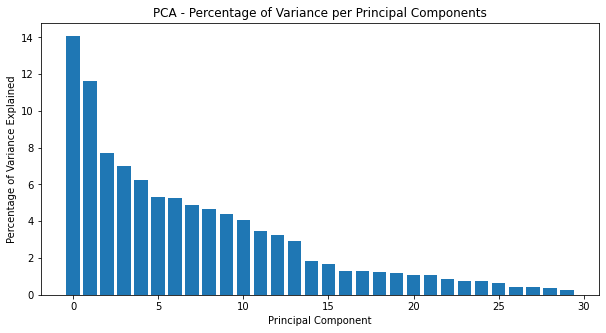

In [73]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1,1,1) 
ax.bar(x = np.arange(len(percent_variance)), height=percent_variance)
ax.set_ylabel('Percentage of Variance Explained')
ax.set_xlabel('Principal Component')
ax.set_title('PCA - Percentage of Variance per Principal Components')


Text(0, 0.5, 'Explained Variance (%)')

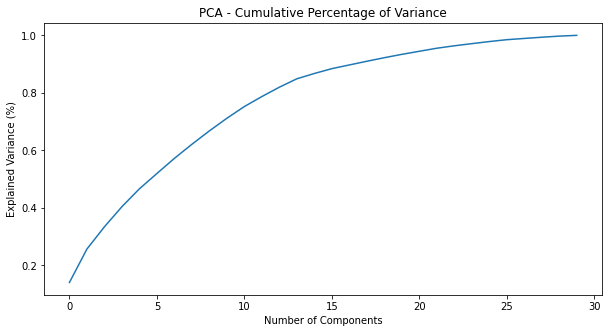

In [72]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1,1,1) 
ax.set_title('PCA - Cumulative Percentage of Variance')
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel("Number of Components")
ax.set_ylabel("Explained Variance (%)")

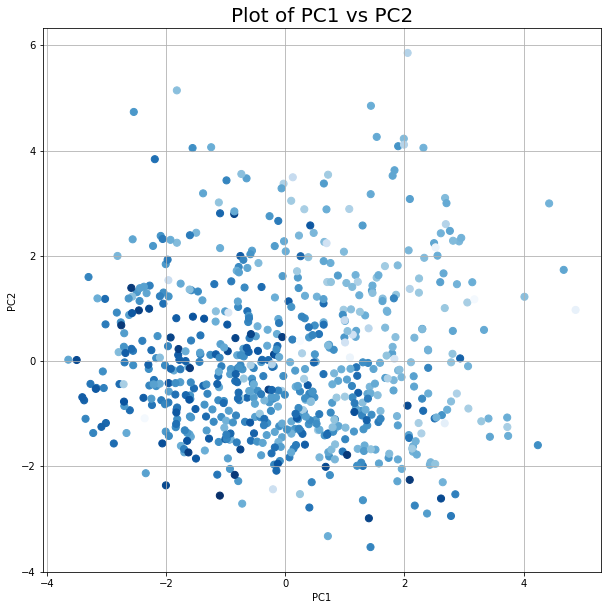

In [74]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.set_title('Plot of PC1 vs PC2', fontsize = 20)

ax.scatter(newDataframe.loc[:, 0] , newDataframe.loc[:,1], c = newDataframe.loc[:,"average"]/20,cmap='Blues' , s = 50)

ax.grid()

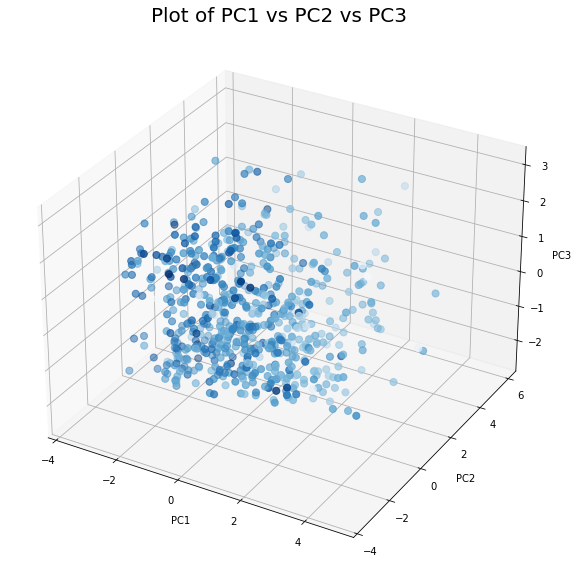

In [75]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection= '3d') 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

ax.set_title('Plot of PC1 vs PC2 vs PC3', fontsize = 20)

gradeAvg = np.mean(np.mean(df.loc[:, ['G1', 'G2', 'G3']],axis=1),axis=0)

indicesToKeep = newDataframe['average'] <= gradeAvg
ax.scatter(newDataframe.loc[:, 0] , newDataframe.loc[:, 1], newDataframe.loc[:, 2], c = newDataframe.loc[:,"average"]/20,cmap='Blues' , s = 50)
plt.Line2D()
ax.grid()